# Find anatomical domains

In [1]:
%config InlineBackend.figure_format = 'retina'
import lazyslide as zs

We've saved the spatialdata on the disk previously, lazyslide will try to reload it when you open the slide again

In [35]:
wsi = zs.WSI("https://brd.nci.nih.gov/brd/imagedownload/GTEX-1117F-1626", cache_dir="tmp")

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
wsi

Slide: tmp/GTEX-1117F-1626
Backed Zarr: tmp/GTEX-1117F-1626.zarr
Reader: openslide
SpatialData object with:
├── Points
│     └── 'tiles': DataFrame with shape: (4396, 2) (2D points)
├── Shapes
│     ├── 'tissue_contours': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'tissue_holes': GeoDataFrame shape: (18, 1) (2D shapes)
└── Tables
      ├── 'tiles_resnet50': AnnData (4396, 1000)
      ├── 'tiles_table': AnnData (4396, 0)
      ├── 'tissue_contours_table': AnnData (6, 0)
      └── 'tissue_holes_table': AnnData (18, 0)
with coordinate systems:
▸ 'global', with elements:
        tiles (Points), tissue_contours (Shapes), tissue_holes (Shapes)

In [46]:
zs.tl.anatomical_domain(wsi, 'resnet50', method="utag", resolution=.3)

AnnData object with n_obs × n_vars = 4396 × 1000
    obs: 'x', 'y', 'tissue_id', 'id', 'tile_key', 'contrast', 'qc', 'domain'
    uns: 'spatialdata_attrs', 'pca', 'neighbors', 'domain'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


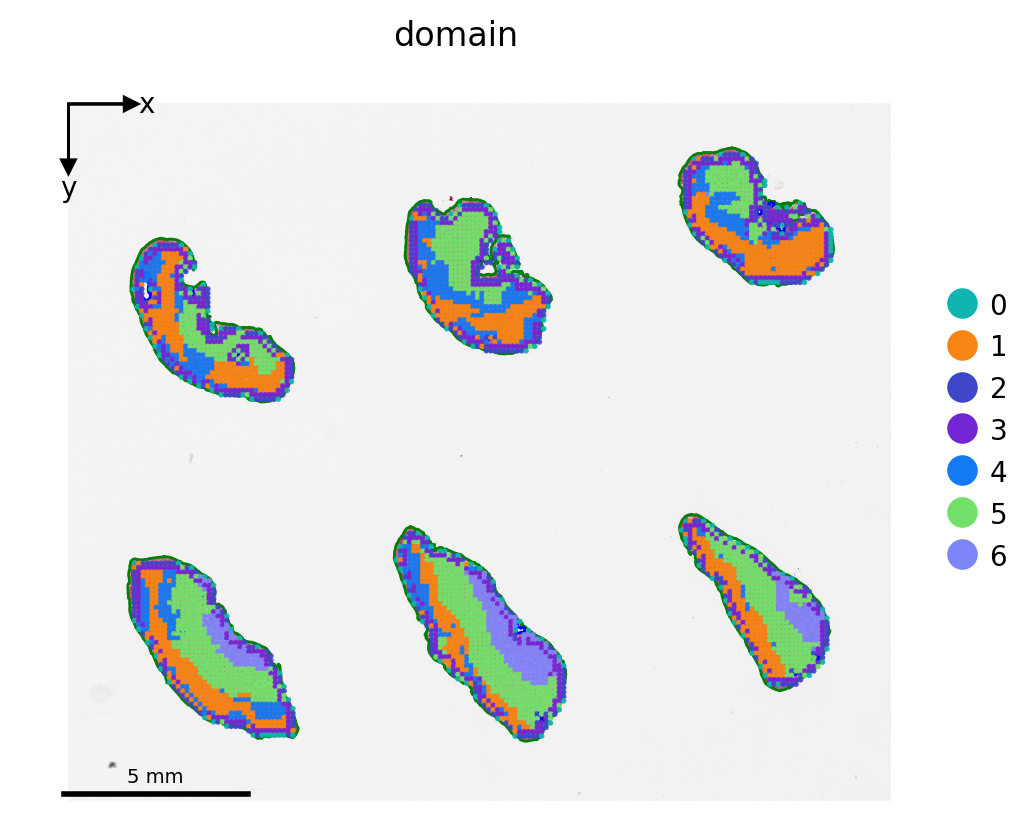

In [47]:
zs.pl.tiles(wsi, color='domain', size=1)

In [48]:
from lazyslide.models import PLIP

plip = PLIP()
zs.tl.feature_extraction(wsi, plip)

Output()

In [21]:
domains = ["Mucosa", "Submucosa"]

zs.tl.annotate(wsi, domains)

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:112: UserWarning: Key `text_embeddings` already exists. Overwriting it.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:112: UserWarning: Key `tiles_PLIP_scores` already exists. Overwriting it.
  self._check_key(key, self.keys(), self._shared_keys)


In [22]:
wsi.get_tiles_table('tiles')

,x,y,tissue_id,id,tile_key,contrast,qc,domain,annotation
0,3960,26829,0,0,tiles,0.598314,True,0,Submucosa
1,3960,27341,0,1,tiles,0.529412,True,1,Submucosa
2,3960,27853,0,2,tiles,0.552941,True,1,Submucosa
3,3960,28365,0,3,tiles,0.600000,True,1,Submucosa
4,3960,28877,0,4,tiles,0.725490,True,1,Submucosa
...,...,...,...,...,...,...,...,...,...
1050,43677,7168,5,1050,tiles,0.701961,True,6,Submucosa
1051,43677,7680,5,1051,tiles,0.788235,True,6,Submucosa
1052,43677,8192,5,1052,tiles,0.780392,True,5,Submucosa
1053,43677,8704,5,1053,tiles,0.823529,True,5,Submucosa


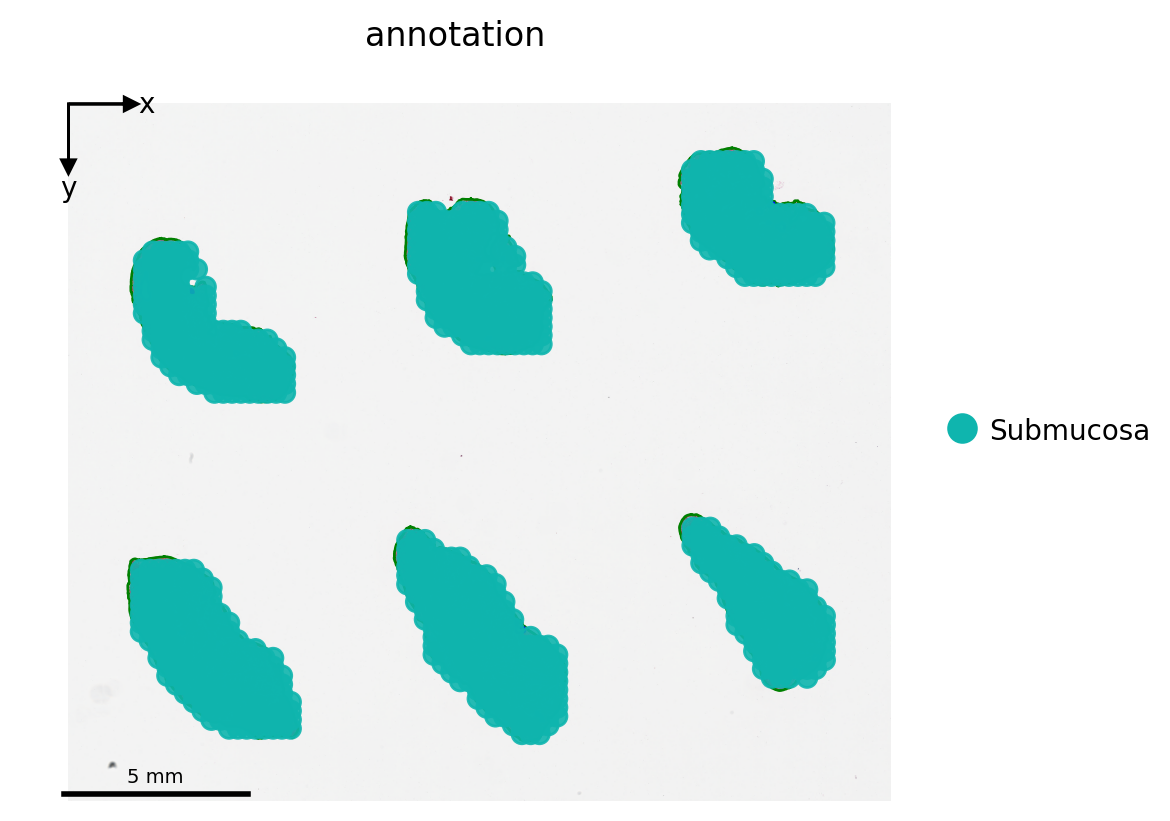

In [23]:
zs.pl.tiles(wsi, color="annotation")

In [24]:
wsi

Slide: tmp/GTEX-1117F-1626
Backed Zarr: tmp/GTEX-1117F-1626.zarr
Reader: openslide
SpatialData object with:
├── Points
│     └── 'tiles': DataFrame with shape: (1055, 2) (2D points)
├── Shapes
│     ├── 'tissue_contours': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'tissue_holes': GeoDataFrame shape: (18, 1) (2D shapes)
└── Tables
      ├── 'text_embeddings': AnnData (2, 512)
      ├── 'tiles_PLIP': AnnData (1055, 512)
      ├── 'tiles_PLIP_scores': AnnData (1055, 2)
      ├── 'tiles_resnet50': AnnData (1055, 1000)
      ├── 'tiles_table': AnnData (1055, 0)
      ├── 'tissue_contours_table': AnnData (6, 0)
      └── 'tissue_holes_table': AnnData (18, 0)
with coordinate systems:
▸ 'global', with elements:
        tiles (Points), tissue_contours (Shapes), tissue_holes (Shapes)

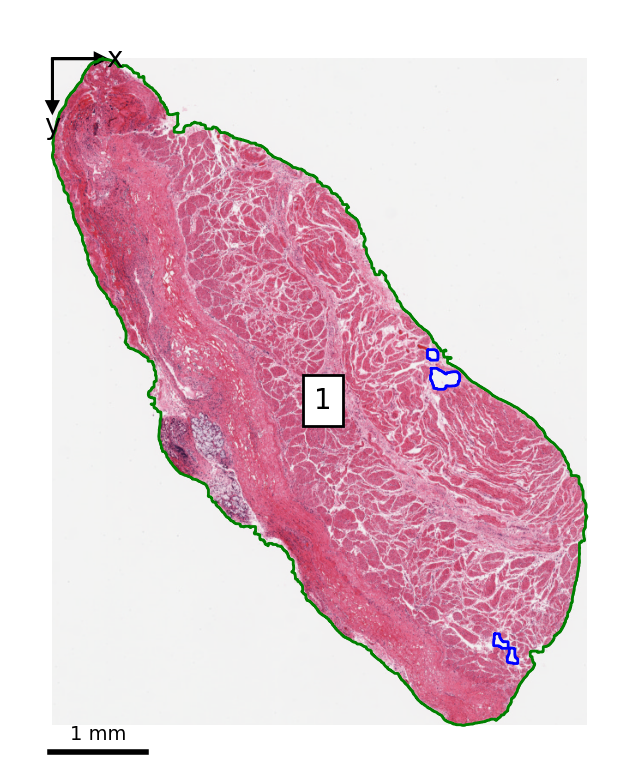

In [32]:
zs.pl.tissue(wsi, tissue_id=1)

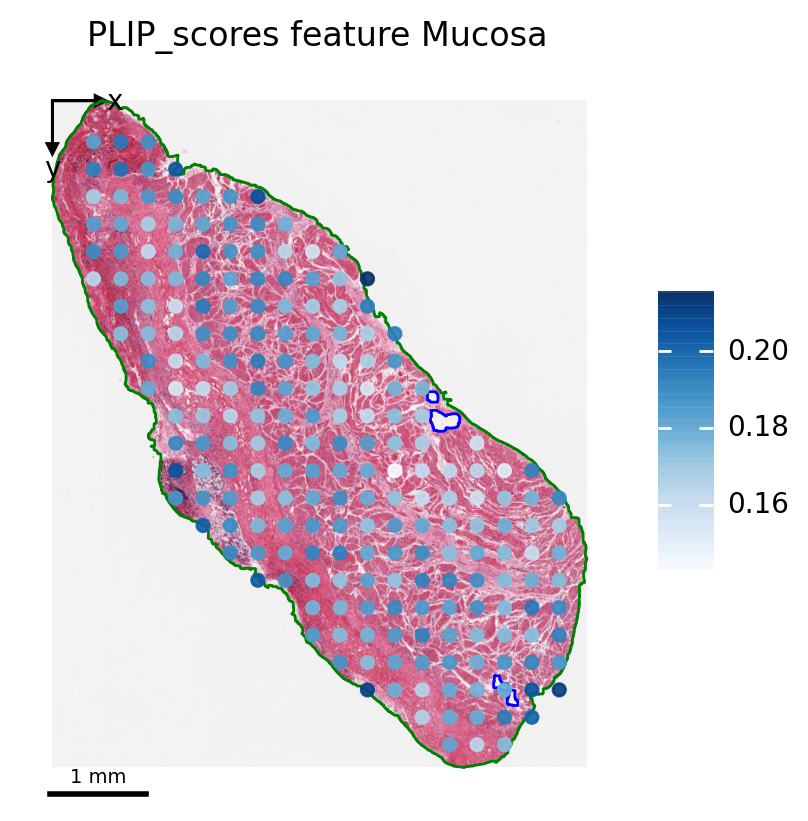

In [34]:
zs.pl.tiles(wsi, tissue_id=1, feature_key="PLIP_scores", color=0, size=20, cmap="Blues")